In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./output/a_y_NPK_pop.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43265 entries, 0 to 43264
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     43265 non-null  int64  
 1   country                        43265 non-null  object 
 2   crop                           43265 non-null  object 
 3   year                           43265 non-null  float64
 4   area_hectares                  43265 non-null  float64
 5   yield_hg_per_ha                43265 non-null  float64
 6   nitrogen_fertilizer_tonnes     43265 non-null  float64
 7   phosphorous_fertilizer_tonnes  43265 non-null  float64
 8   potassium_fertilizer_tonnes    43265 non-null  float64
 9   population                     43265 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.3+ MB


In [4]:
df.drop(columns = "Unnamed: 0",inplace=True)

In [5]:
df.head(2)

,country,crop,year,area_hectares,yield_hg_per_ha,nitrogen_fertilizer_tonnes,phosphorous_fertilizer_tonnes,potassium_fertilizer_tonnes,population
0,Afghanistan,Barley,1974.0,340200.0,11170.0,24200.0,9600.0,100.0,12412950.0
1,Afghanistan,Maize,1974.0,476200.0,16170.0,24200.0,9600.0,100.0,12412950.0


In [6]:
df.shape

(43265, 9)

In [7]:
# Use the the commented pip command below to install pycountry_convert if necessary
#pip install pycountry_convert

In [8]:
# This portion of code finds all the continents for each country in our data frame 
# and adds it to a new column called continent
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

countries = []
for key, val in dict(df['country'].value_counts()).items():
    countries.append(key)
countries

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
    'EU': 'Europe'
}

def country_con(country):
    if country in ('China, mainland', 'Republic of Korea', 'Iran (Islamic Republic of)', 'China, Taiwan Province of'):
        return 'AS'
    elif country in ('Bolivia (Plurinational State of)',  'Venezuela (Bolivarian Republic of)'):
        return 'SA'
    elif country in ('USSR', 'Yugoslav SFR', 'Czechoslovakia', 'Belgium-Luxembourg', 'Serbia and Montenegro'):
        return 'EU'
    elif country in ('Sudan (former)', 'Ethiopia PDR'):
        return 'AF'
    else:
        return country_alpha2_to_continent_code(country_name_to_country_alpha2(country))

continents_full = df['country'].apply(country_con)

df['continent'] = continents_full

In [9]:
df['continent'] = [continents[i] for i in df['continent']]

In [10]:
df.head()

,country,crop,year,area_hectares,yield_hg_per_ha,nitrogen_fertilizer_tonnes,phosphorous_fertilizer_tonnes,potassium_fertilizer_tonnes,population,continent
0,Afghanistan,Barley,1974.0,340200.0,11170.0,24200.0,9600.0,100.0,12412950.0,Asia
1,Afghanistan,Maize,1974.0,476200.0,16170.0,24200.0,9600.0,100.0,12412950.0,Asia
2,Afghanistan,Potatoes,1974.0,16600.0,109639.0,24200.0,9600.0,100.0,12412950.0,Asia
3,Afghanistan,"Rice, paddy",1974.0,210000.0,20000.0,24200.0,9600.0,100.0,12412950.0,Asia
4,Afghanistan,Wheat,1974.0,2277600.0,12074.0,24200.0,9600.0,100.0,12412950.0,Asia


In [11]:
df['crop'].value_counts() # The number of each type of crop in our data

Maize          6794
Potatoes       6769
Wheat          5457
Rice, paddy    5253
Sorghum        4697
Barley         4505
Soybeans       3930
Cassava        3847
Yams           2013
Name: crop, dtype: int64

## EDA 

### Explore relationships between yield and the features in our data such as crop type, area harvested, population, and year

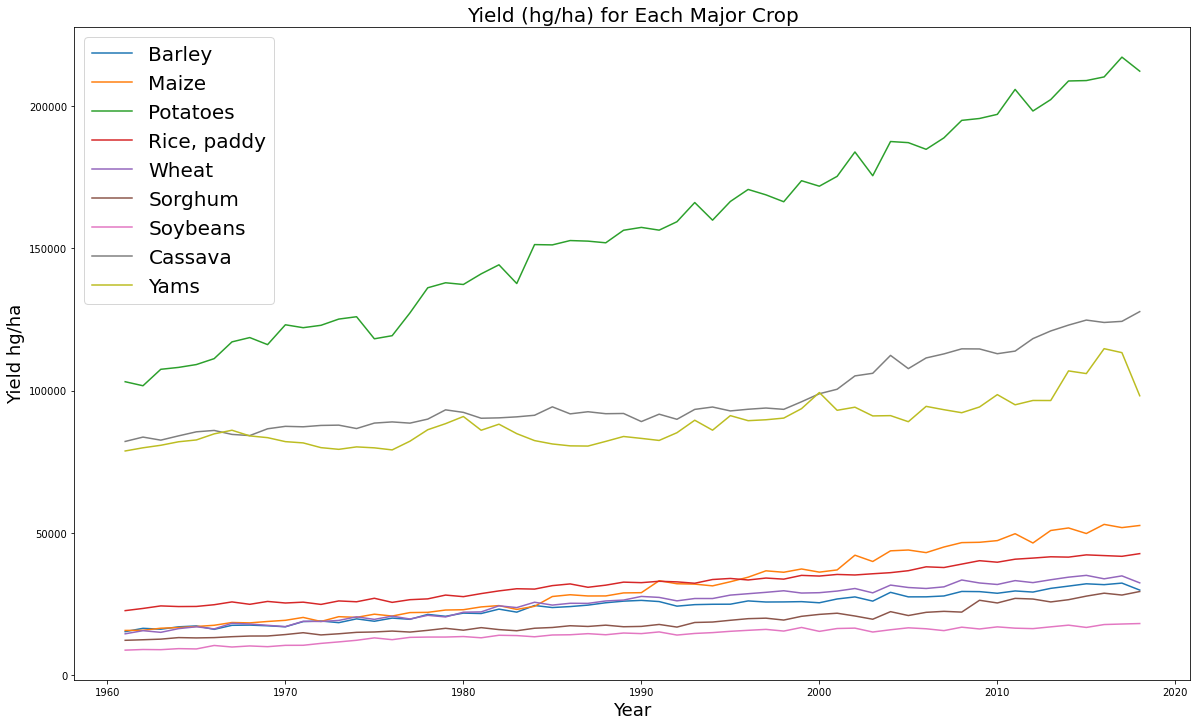

In [12]:
for_yield = df[['year', 'crop', 'yield_hg_per_ha']]
plt.figure(figsize = (20,12))
sns.lineplot(data=for_yield, x="year", y="yield_hg_per_ha", hue="crop", ci=None)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Yield hg/ha', fontsize=18)
plt.title("Yield (hg/ha) for Each Major Crop",fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('./images/fao_crop_longitudinal_yield.png',bbox_inches = 'tight');

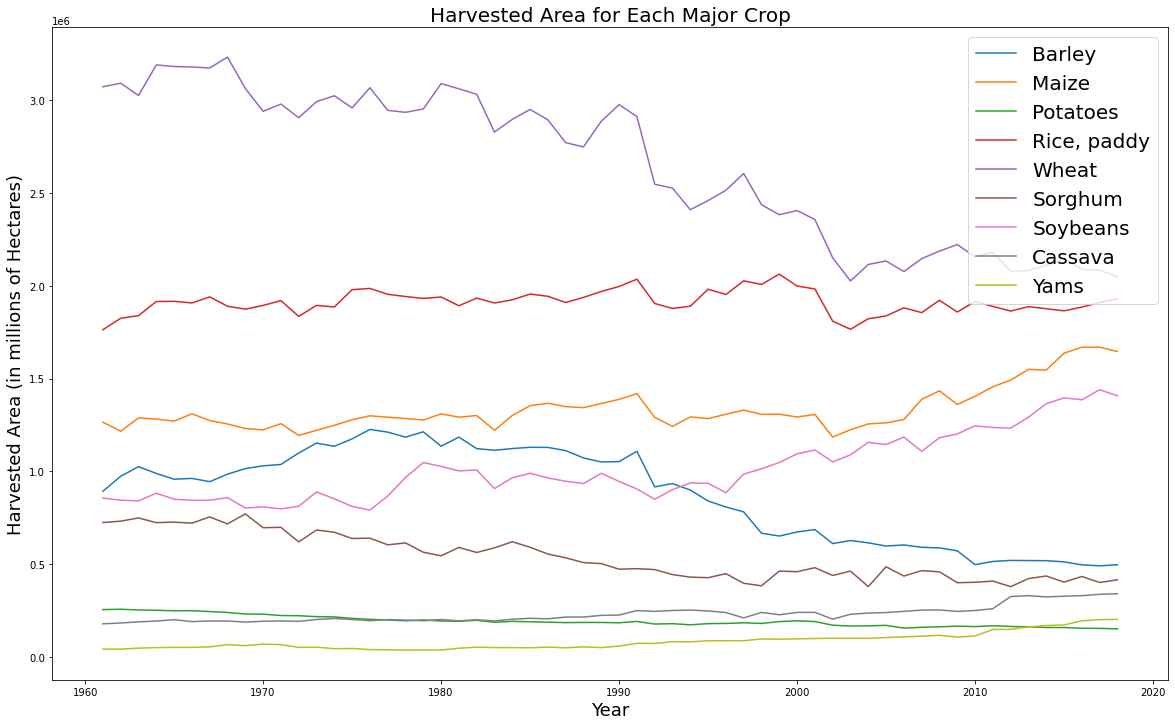

In [13]:
for_area = df[['year', 'crop', 'area_hectares']]
plt.figure(figsize = (20,12))
sns.lineplot(data=for_area, x="year", y="area_hectares", hue="crop", ci=None)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Harvested Area (in millions of Hectares)', fontsize=18)
plt.title("Harvested Area for Each Major Crop",fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('./images/fao_longitudinal_cultivated_area.png',bbox_inches = 'tight');

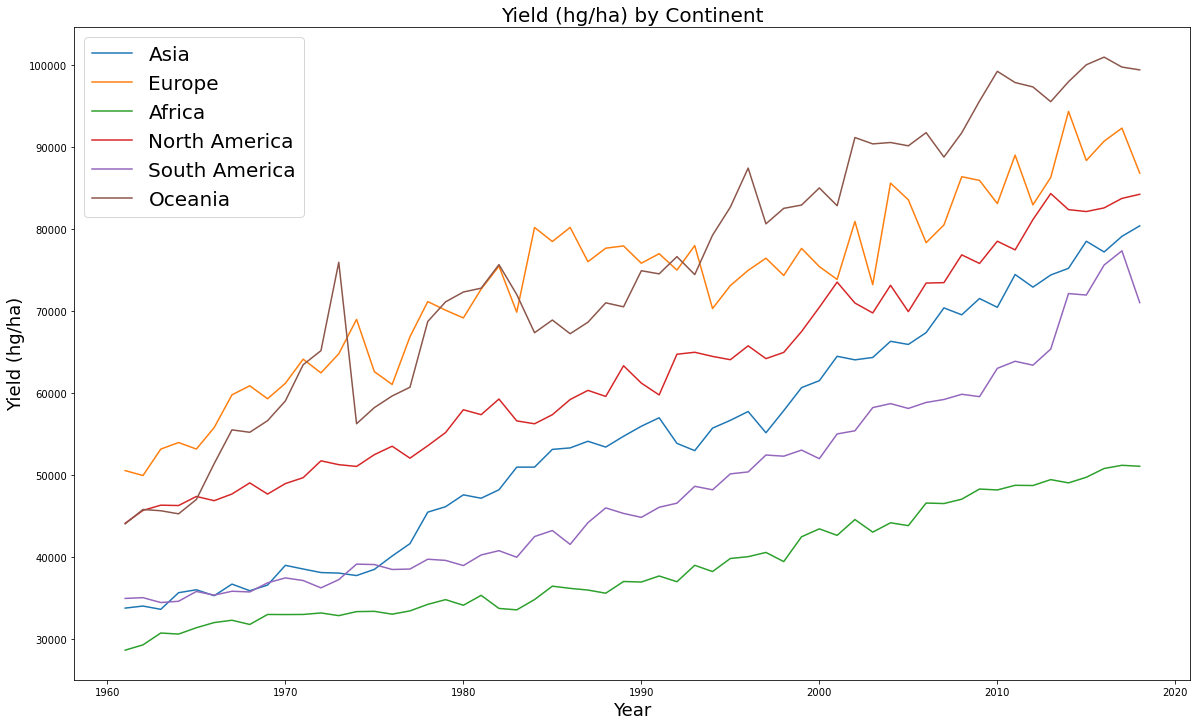

In [14]:
for_yield = df[['year', 'continent', 'yield_hg_per_ha']]
plt.figure(figsize = (20,12))
sns.lineplot(data=for_yield, x="year", y="yield_hg_per_ha", hue="continent", ci=None)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Yield (hg/ha)', fontsize=18)
plt.title('Yield (hg/ha) by Continent',fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('./images/fao_continental_yield.png',bbox_inches = 'tight');

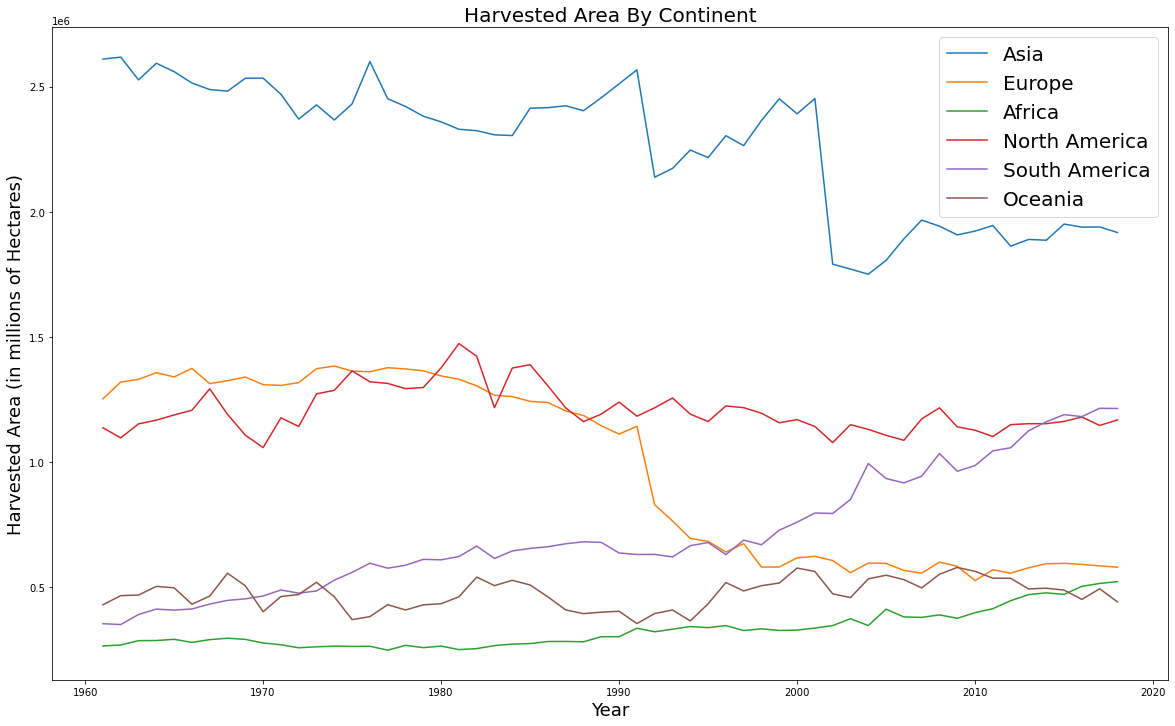

In [15]:
for_area = df[['year', 'continent', 'area_hectares','population']]
plt.figure(figsize = (20,12))
sns.lineplot(data=for_area, x="year", y="area_hectares",hue="continent", ci=None)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Harvested Area (in millions of Hectares)', fontsize=18)
plt.title("Harvested Area By Continent",fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('./images/fao_continental_cultivated_area.png',bbox_inches = 'tight');

### It may be relevant to see our data from our new perspective, such as yield per capita, yield multiplied by area to make total production, and total production per capita. Here we create new columns by calculating these parameters from existing features

In [16]:
df['yield_per_capita'] = df['yield_hg_per_ha']/df['population']
df['total_yield'] = df['yield_hg_per_ha'] * df['area_hectares']
df['total_yield_per_capita'] = df['total_yield']/df['population']


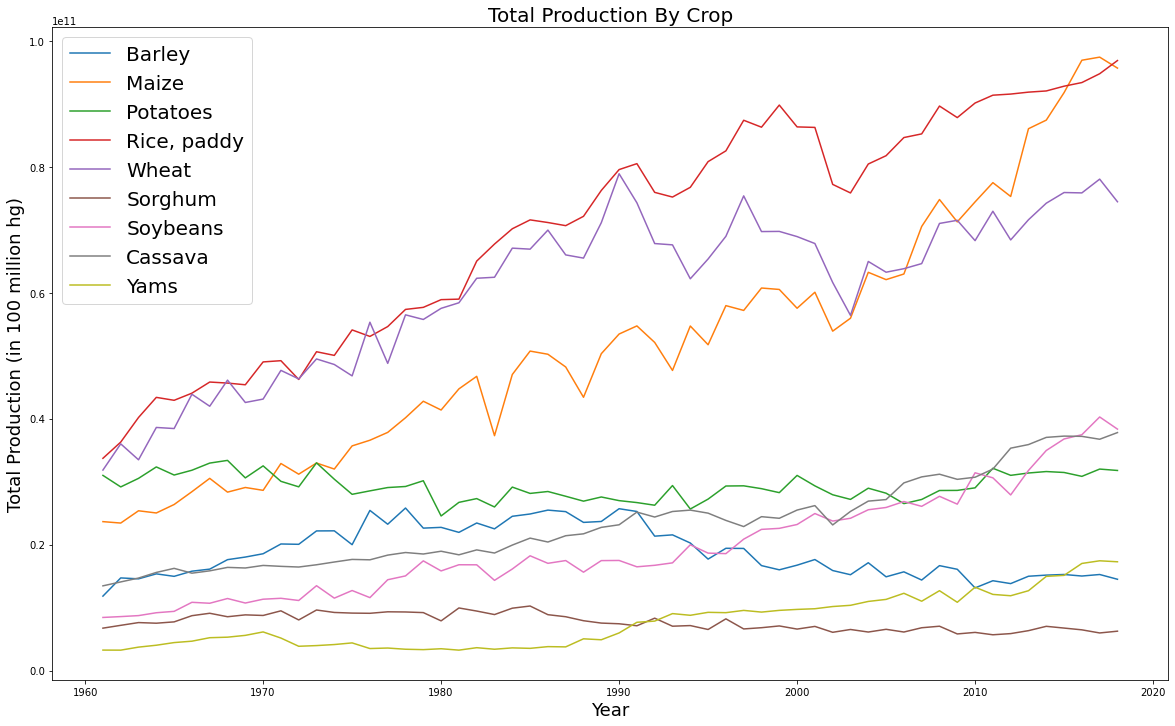

In [17]:
for_yield = df[['year', 'crop', 'total_yield']]
plt.figure(figsize = (20,12))
sns.lineplot(data=for_yield, x="year", y="total_yield", hue="crop", ci=None)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Production (in 100 million hg)', fontsize=18)
plt.legend(fontsize = 20)
plt.title("Total Production By Crop",fontsize = 20)
plt.savefig('./images/fao_global_total_crop_yields.png',bbox_inches = 'tight');

In [18]:
## Prepare the fertilizer data for the three main elements investigated:
# Potassium, Nitrogen and Phosphorous
for_pop = df[['year', 'population']]
for_nitro = df[['year', 'crop', 'nitrogen_fertilizer_tonnes']]
for_pho = df[['year', 'crop', 'phosphorous_fertilizer_tonnes']]
for_k = df[['year','potassium_fertilizer_tonnes']]


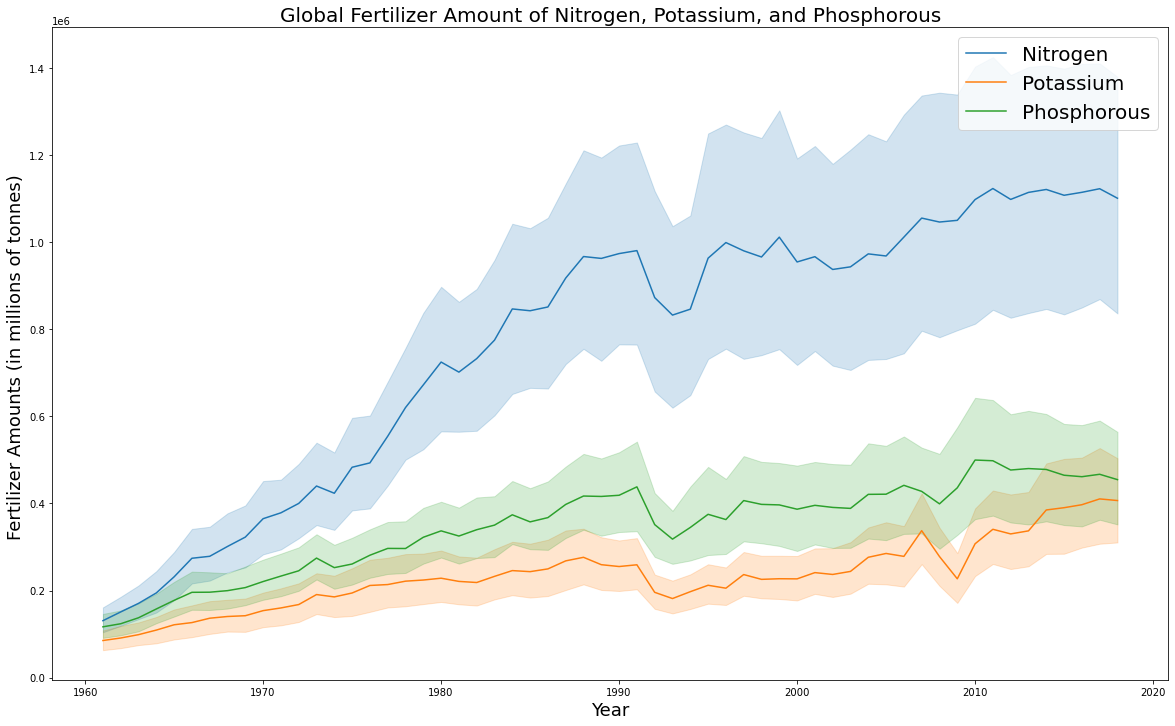

In [19]:
plt.figure(figsize = (20,12))
sns.lineplot(data=for_nitro, x="year", y="nitrogen_fertilizer_tonnes", label = 'Nitrogen')
sns.lineplot(data=for_k, x="year", y="potassium_fertilizer_tonnes", label = 'Potassium')
sns.lineplot(data=for_pho, x="year", y="phosphorous_fertilizer_tonnes", label = 'Phosphorous')
plt.legend()
plt.xlabel('Year', fontsize=18)
plt.ylabel('Fertilizer Amounts (in millions of tonnes) ', fontsize=18)
plt.title('Global Fertilizer Amount of Nitrogen, Potassium, and Phosphorous',fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('./images/fao_fertilizer_use.png',bbox_inches = 'tight');

### Now let's take a look at the top crops for each "type" of yield: hg/ha, production (yield * area harvested), production per capita (production / population)

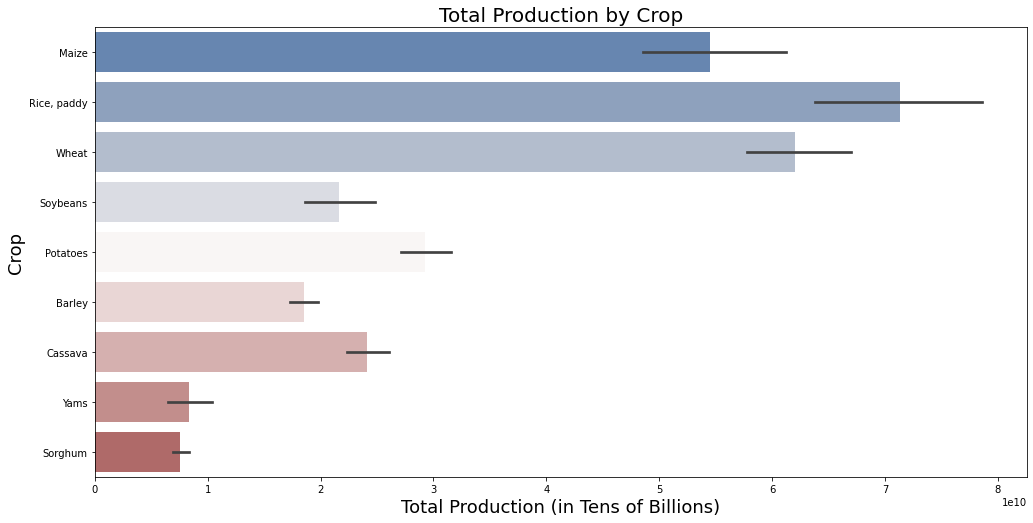

In [20]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
yield_sort = df.sort_values(ascending=False,by=["total_yield"])
sns.barplot(x="total_yield",y="crop",palette="vlag",data=yield_sort,orient="h", ax=ax);
plt.xlabel('Total Production (in Tens of Billions)', fontsize=18)
plt.ylabel('Crop', fontsize=18)
plt.title("Total Production by Crop",fontsize = 20)
plt.savefig('./images/top_crops_by_total_production.png',bbox_inches = 'tight');

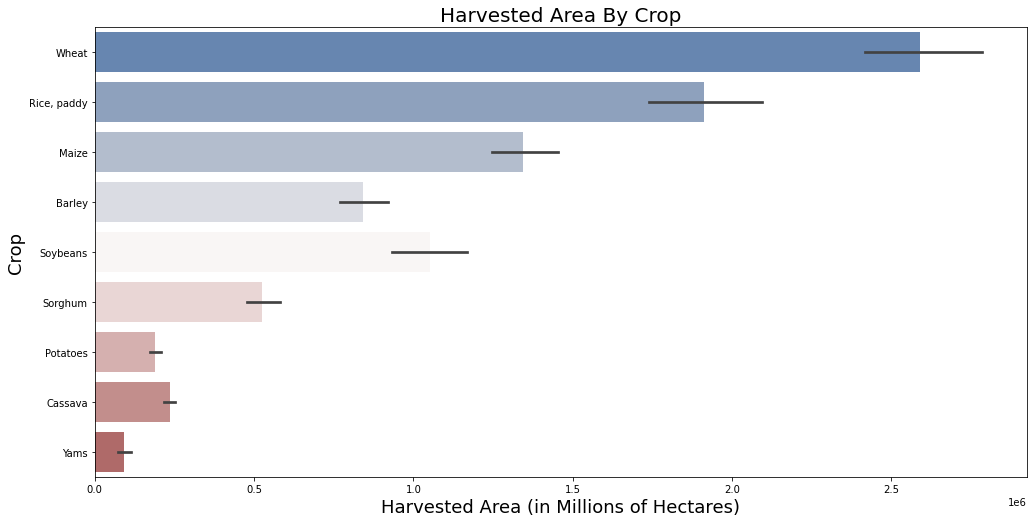

In [21]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
yield_sort = df.sort_values(ascending=False,by=["area_hectares"])
sns.barplot(x="area_hectares",y="crop",palette="vlag",data=yield_sort,orient="h",ax=ax);
plt.xlabel('Harvested Area (in Millions of Hectares)', fontsize=18)
plt.ylabel('Crop', fontsize=18)
plt.title("Harvested Area By Crop",fontsize = 20)
plt.savefig('./images/top_crops_by_area.png',bbox_inches = 'tight');

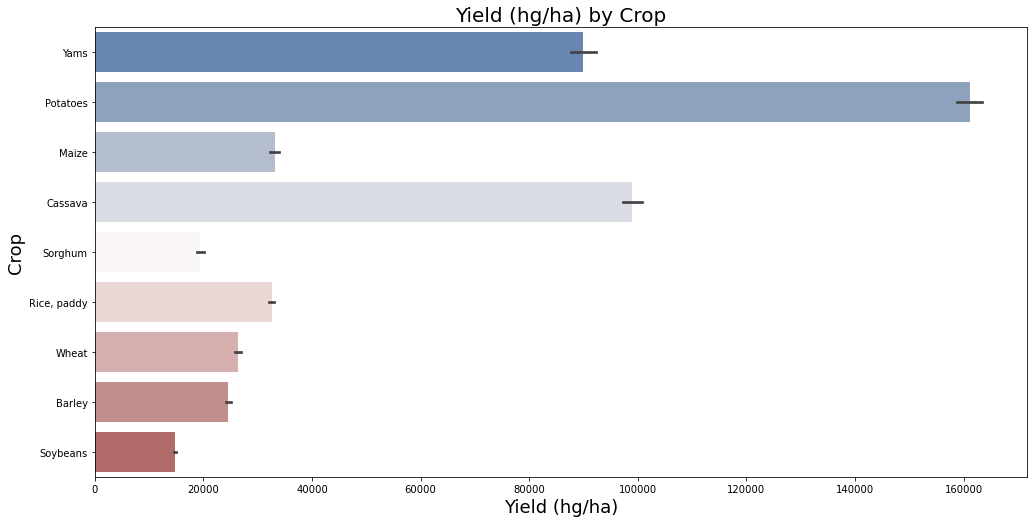

In [22]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
yield_sort = df.sort_values(ascending=False,by=["yield_hg_per_ha"])
sns.barplot(x="yield_hg_per_ha",y="crop",palette="vlag",data=yield_sort,orient="h",ax=ax);
plt.xlabel('Yield (hg/ha)', fontsize=18)
plt.ylabel('Crop', fontsize=18)
plt.title("Yield (hg/ha) by Crop",fontsize = 20)
plt.savefig('./images/top_crops_by_yield.png',bbox_inches = 'tight');

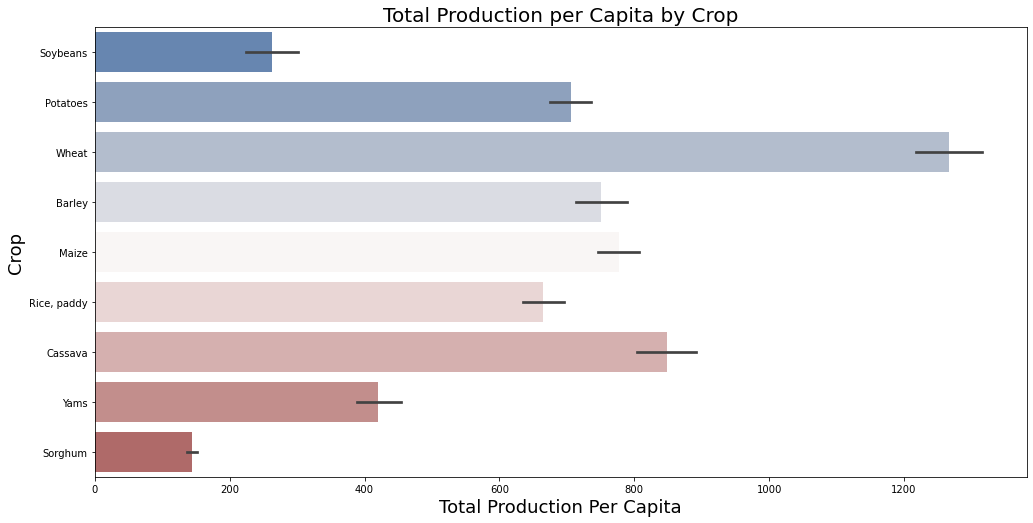

In [23]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
yield_sort = df.sort_values(ascending=False,by=["total_yield_per_capita"])
sns.barplot(x="total_yield_per_capita",y="crop",palette="vlag",data=yield_sort,orient="h",ax=ax);
plt.xlabel('Total Production Per Capita', fontsize=18)
plt.ylabel('Crop', fontsize=18)
plt.title("Total Production per Capita by Crop",fontsize = 20)
plt.savefig('./images/top_crops_by_production_percapita.png',bbox_inches = 'tight');

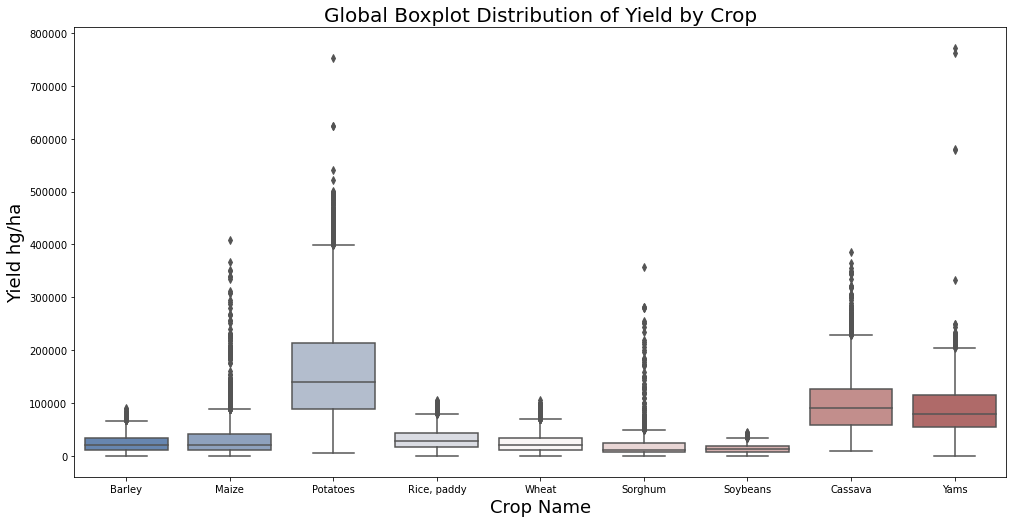

In [24]:
a4_dims = (16.7, 8.27)
boxplot_data_yield = df[['crop', 'yield_hg_per_ha']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="crop",y="yield_hg_per_ha",palette="vlag",data=boxplot_data_yield,ax=ax);
plt.xlabel('Crop Name', fontsize=18)
plt.ylabel('Yield hg/ha', fontsize=18)
plt.title("Global Boxplot Distribution of Yield by Crop",fontsize = 20)
plt.savefig('./images/crop_yield_boxplot.png',bbox_inches = 'tight');

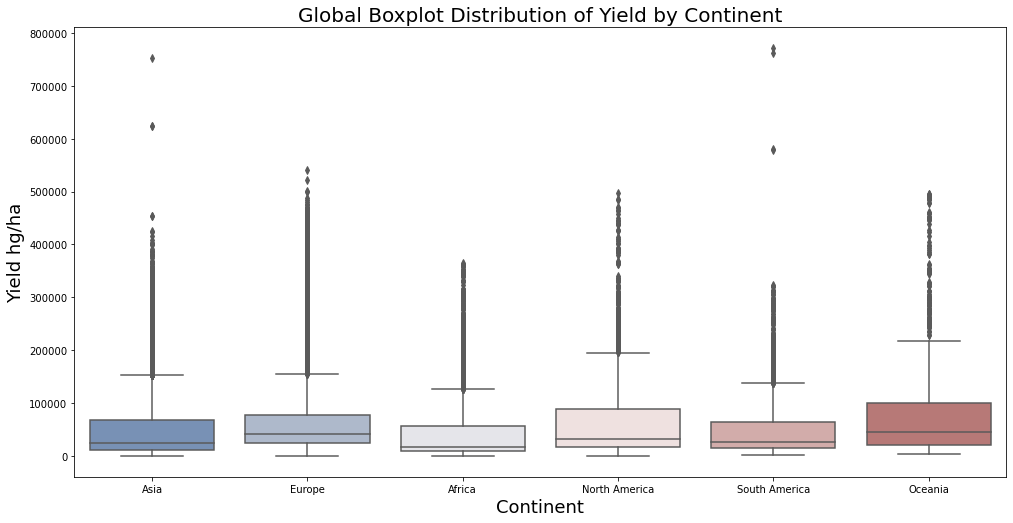

In [25]:
a4_dims = (16.7, 8.27)
boxplot_data_yield = df[['continent', 'yield_hg_per_ha']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="continent",y="yield_hg_per_ha",palette="vlag",data=boxplot_data_yield,ax=ax)
plt.xlabel('Continent', fontsize=18)
plt.ylabel('Yield hg/ha', fontsize=18)
plt.title("Global Boxplot Distribution of Yield by Continent",fontsize = 20)

plt.savefig('./images/continent_yield_boxplot.png',bbox_inches = 'tight');

#### [Boxplot Reference 1](https://www.kaggle.com/patelris/crop-yield-eda-viz)
#### [Boxplot Reference 2](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)

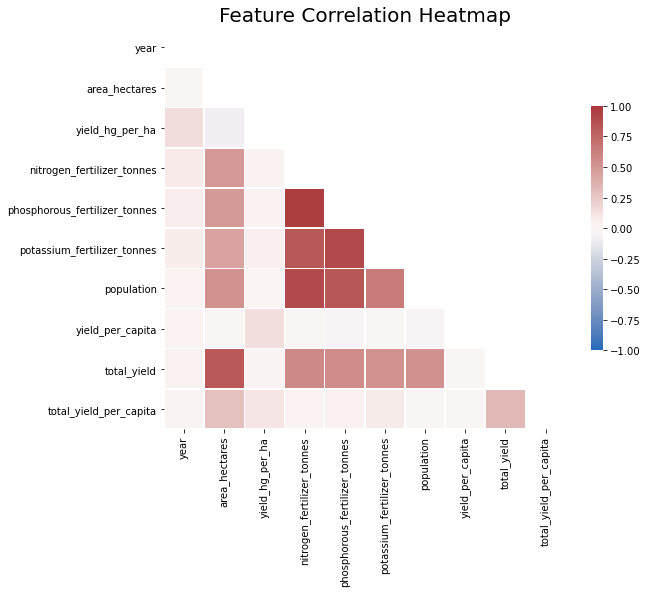

In [26]:
correlation_data=df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Feature Correlation Heatmap",fontsize = 20)

plt.savefig('./images/feature_heatmap.png',bbox_inches = 'tight');


### [Heatmap Reference](https://www.kaggle.com/patelris/crop-yield-eda-viz)

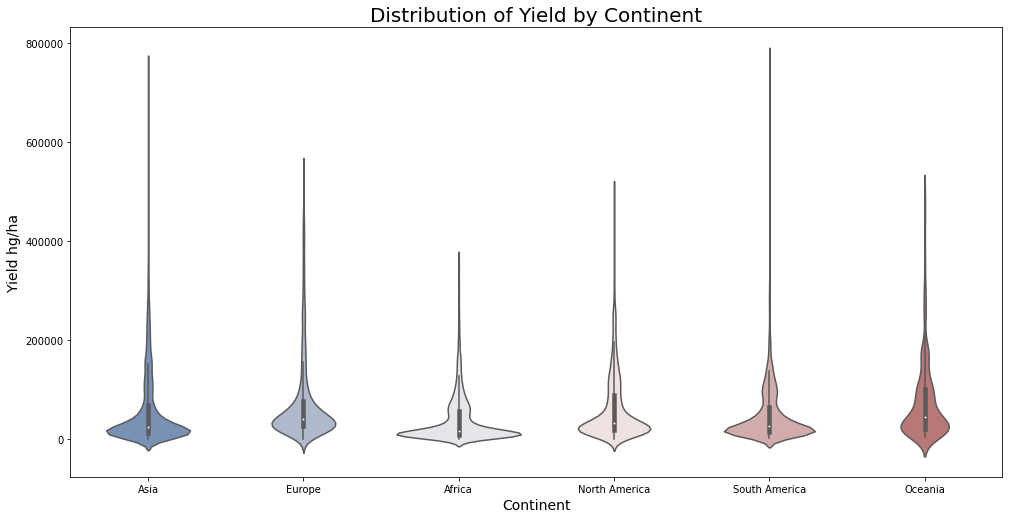

In [27]:
a4_dims = (16.7, 8.27)
violinplot_data_yield = df[['continent', 'yield_hg_per_ha']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="continent",y="yield_hg_per_ha",palette="vlag",data=boxplot_data_yield,ax=ax)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Yield hg/ha', fontsize=14)
plt.title("Distribution of Yield by Continent",fontsize = 20)
plt.savefig('./images/continent_yield_violinplot.png',bbox_inches = 'tight');

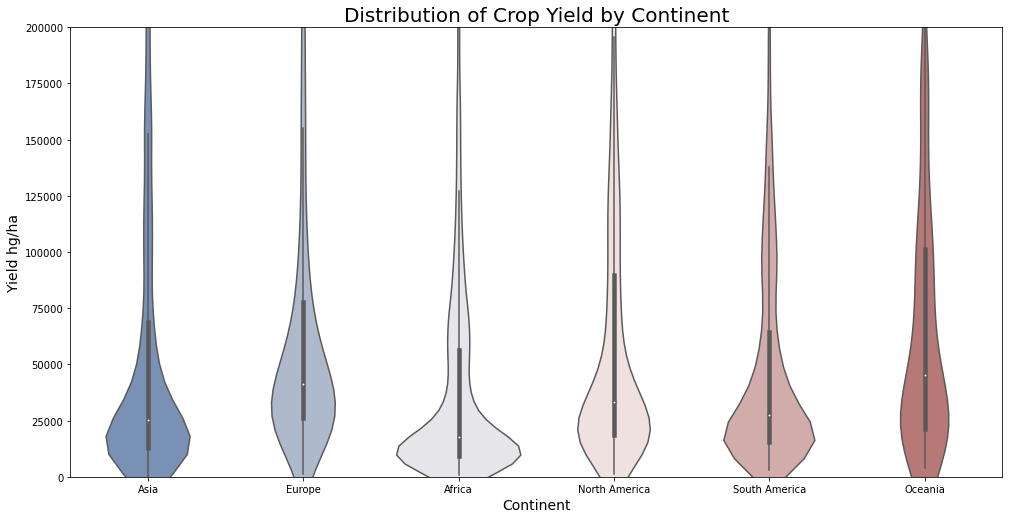

In [28]:
a4_dims = (16.7, 8.27)
boxplot_data_yield = df[['continent', 'yield_hg_per_ha']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="continent",y="yield_hg_per_ha",palette="vlag",data=boxplot_data_yield,ax=ax)
plt.ylim(top = 200000,bottom = 0)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Yield hg/ha', fontsize=14)
plt.title("Distribution of Crop Yield by Continent",fontsize = 20)
plt.savefig('./images/continent_yield_violinplot_zoom.png',bbox_inches = 'tight');

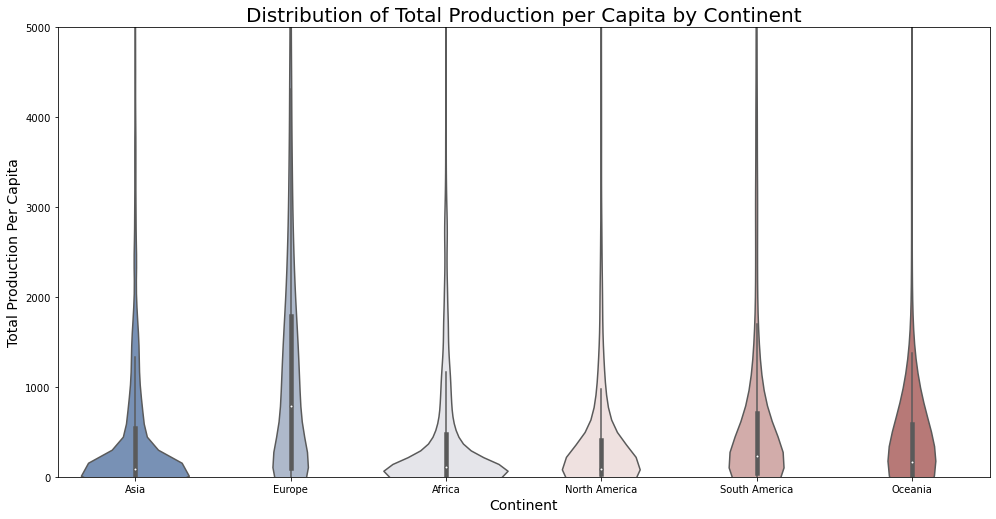

In [29]:
a4_dims = (16.7, 8.27)
boxplot_data_yield = df[['continent', 'total_yield_per_capita']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="continent",y="total_yield_per_capita",palette="vlag",data=boxplot_data_yield,ax=ax)
plt.ylim(top = 5000,bottom = 0)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Total Production Per Capita', fontsize=14)
plt.title("Distribution of Total Production per Capita by Continent",fontsize = 20)
plt.savefig('./images/crop_yield_violinplot.png',bbox_inches = 'tight');

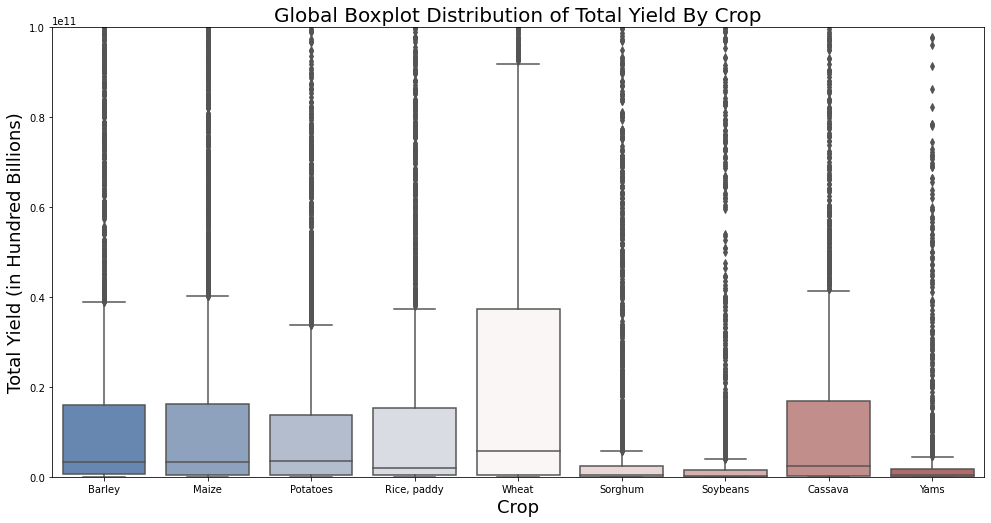

In [30]:
a4_dims = (16.7, 8.27)
boxplot_data_yield = df[['crop', 'total_yield']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="crop",y="total_yield",palette="vlag",data=boxplot_data_yield,ax=ax)
plt.ylim(top = 0.1e12,bottom = 0)
plt.xlabel('Crop', fontsize=18)
plt.ylabel('Total Yield (in Hundred Billions)', fontsize=18)
plt.title("Global Boxplot Distribution of Total Yield By Crop",fontsize = 20)
plt.savefig('./images/crop_total_yield_boxplot.png',bbox_inches = 'tight');

### Now, let's explore our individual crops to see if there are further things we can understand about the types of patterns at the level of each individual crop

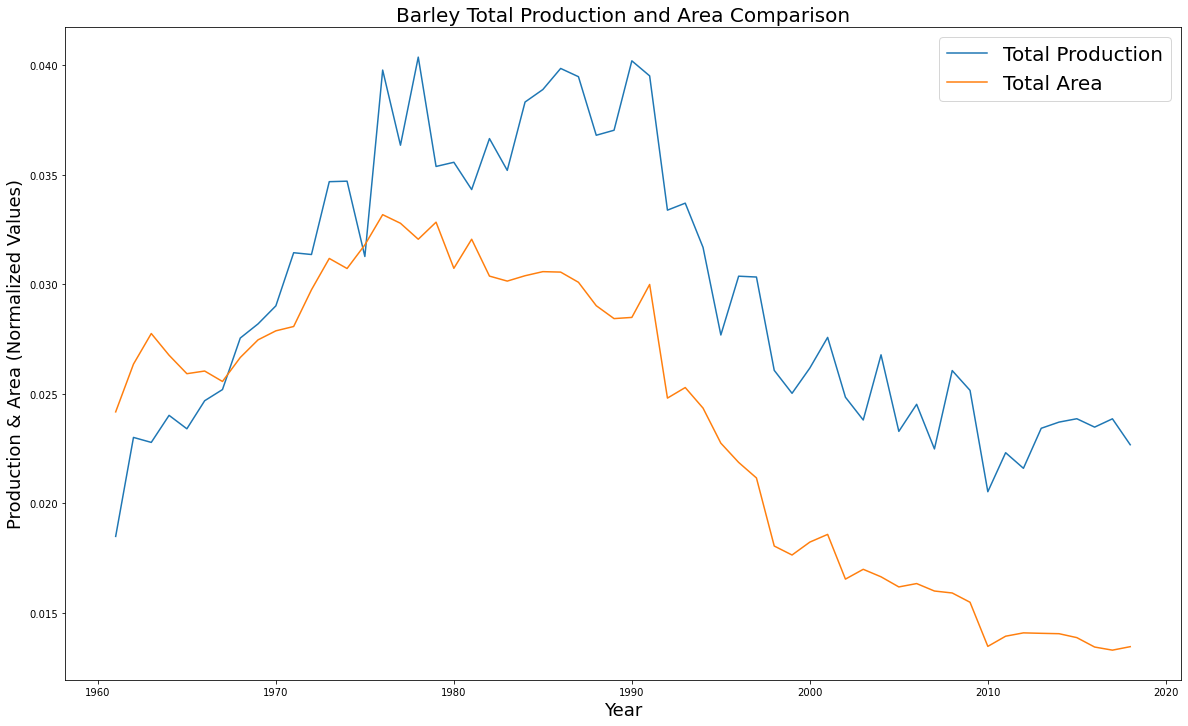

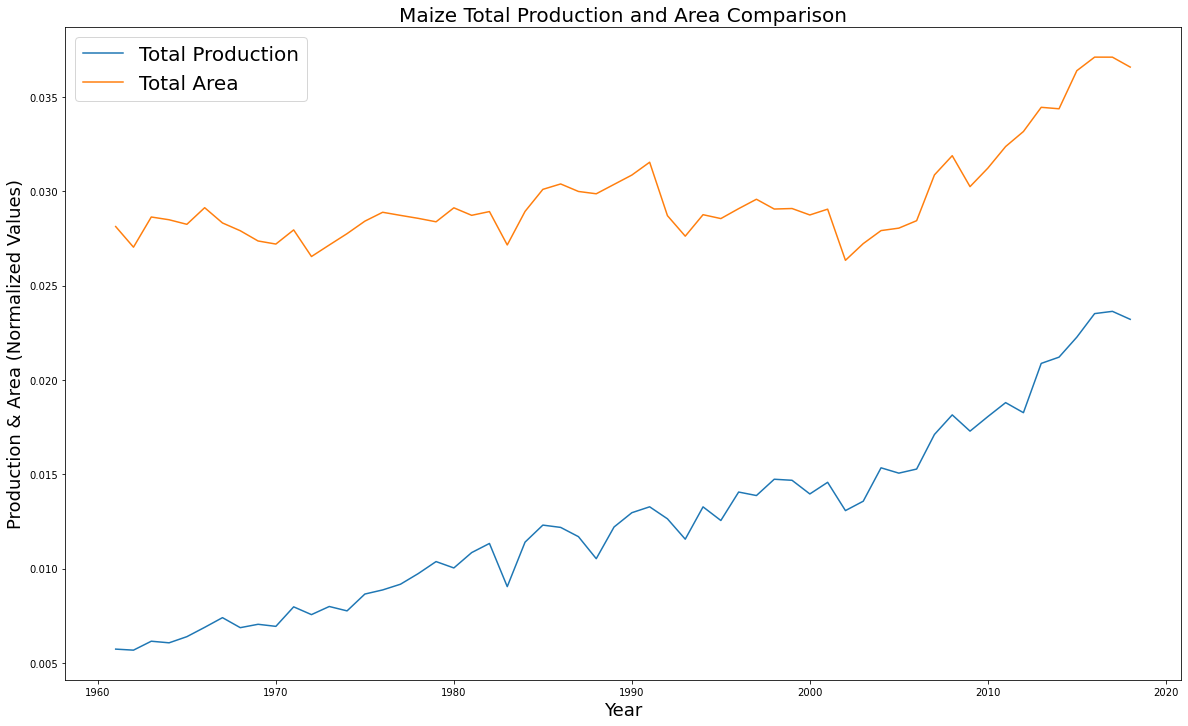

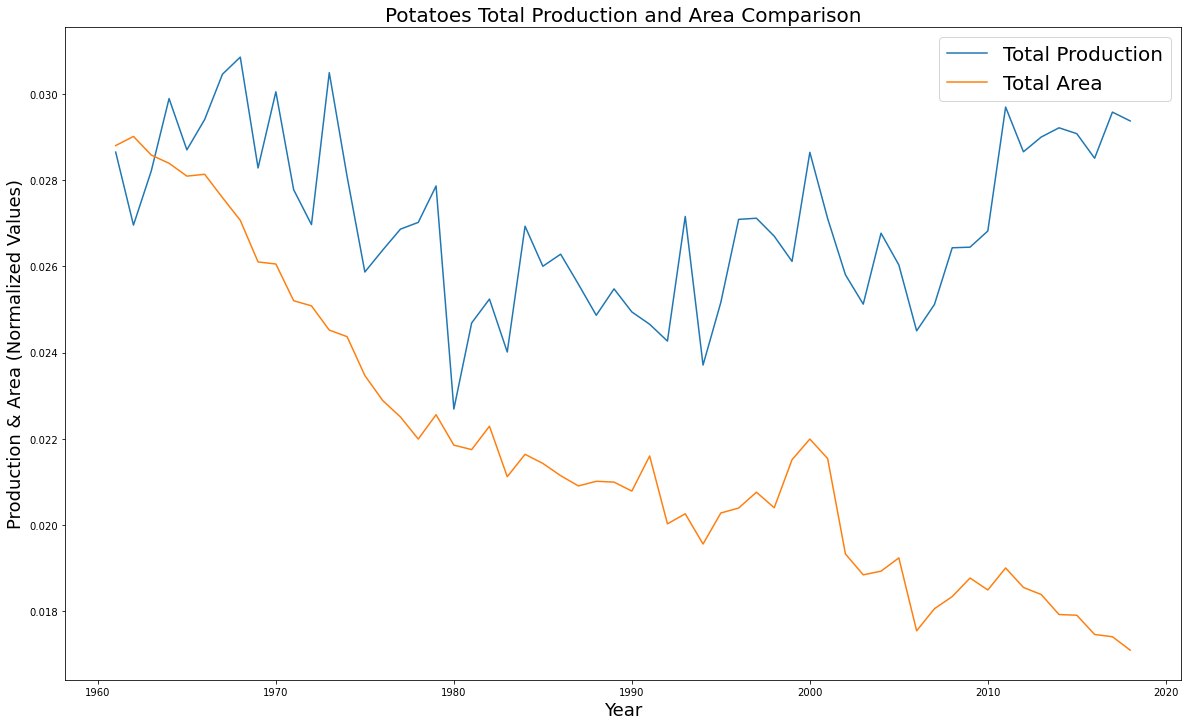

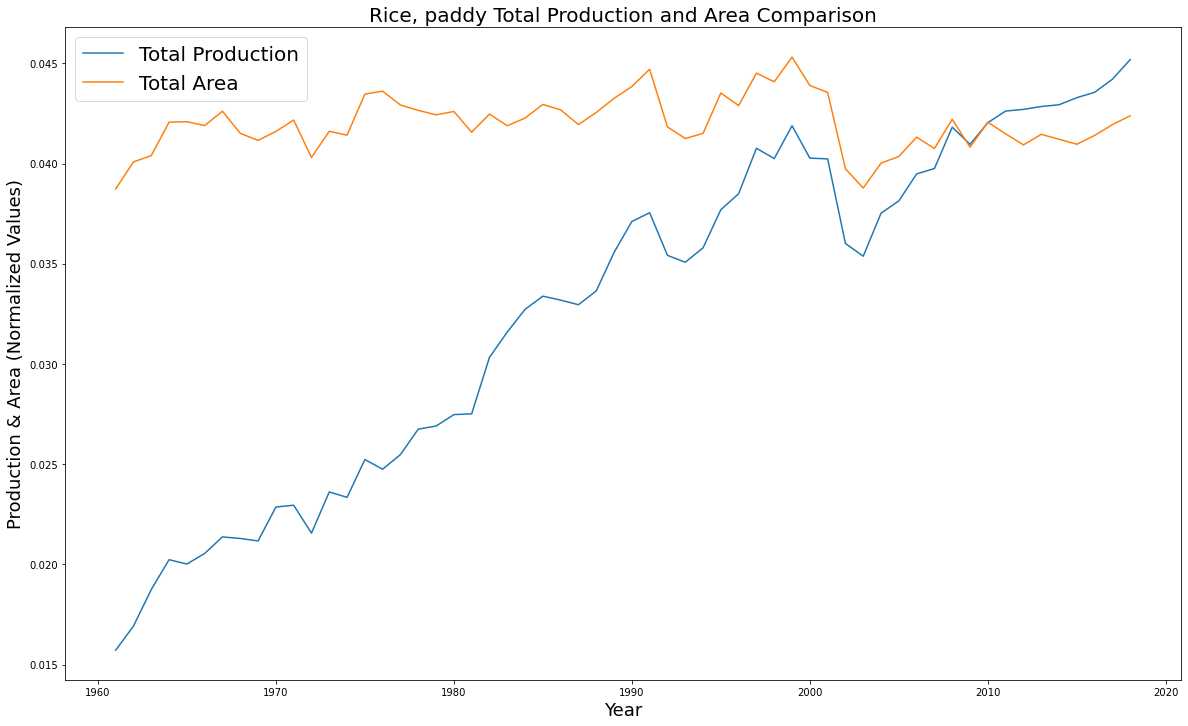

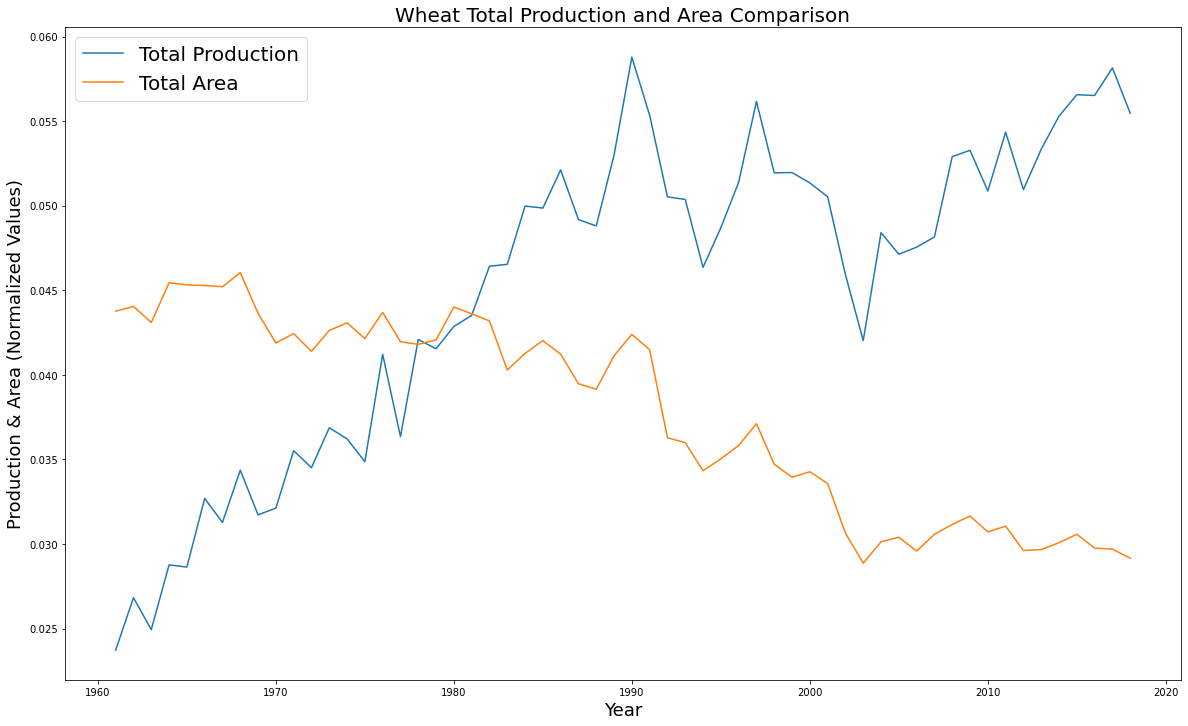

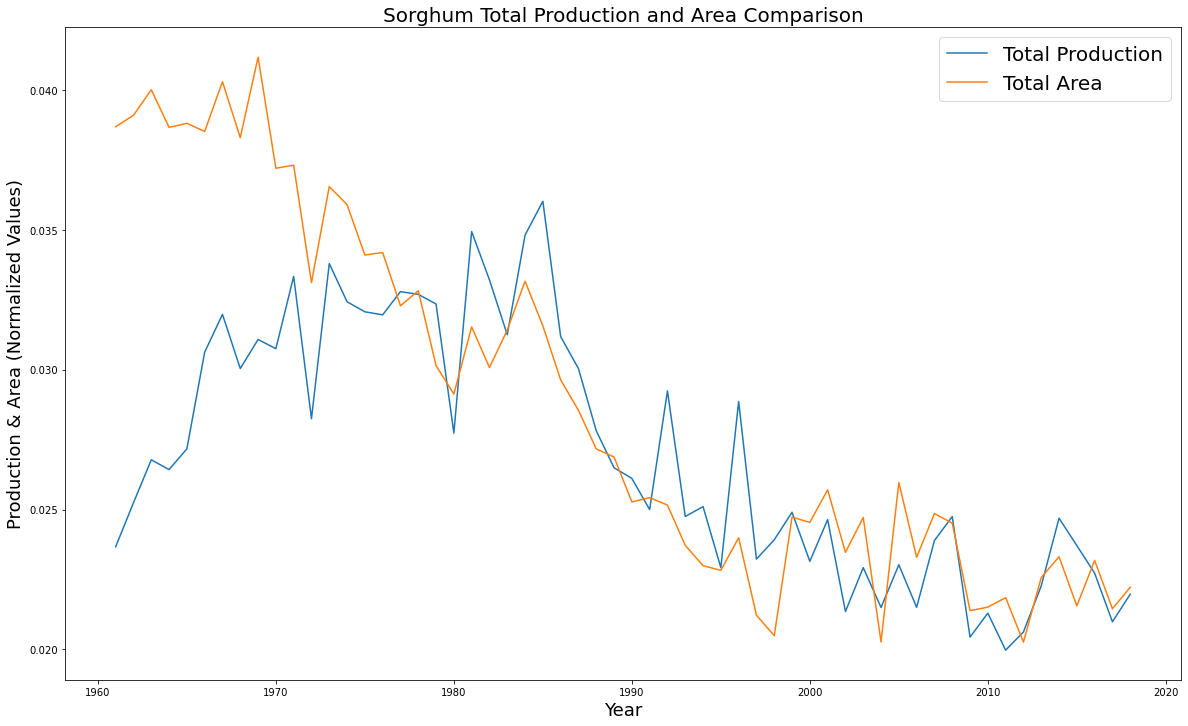

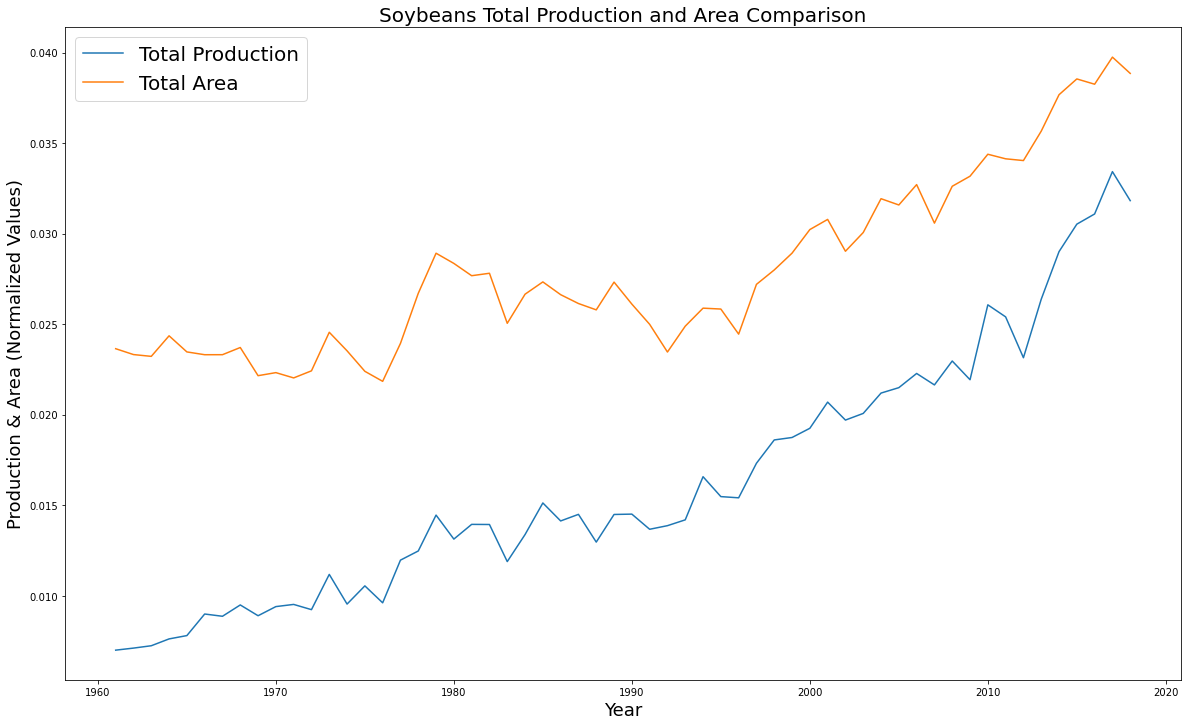

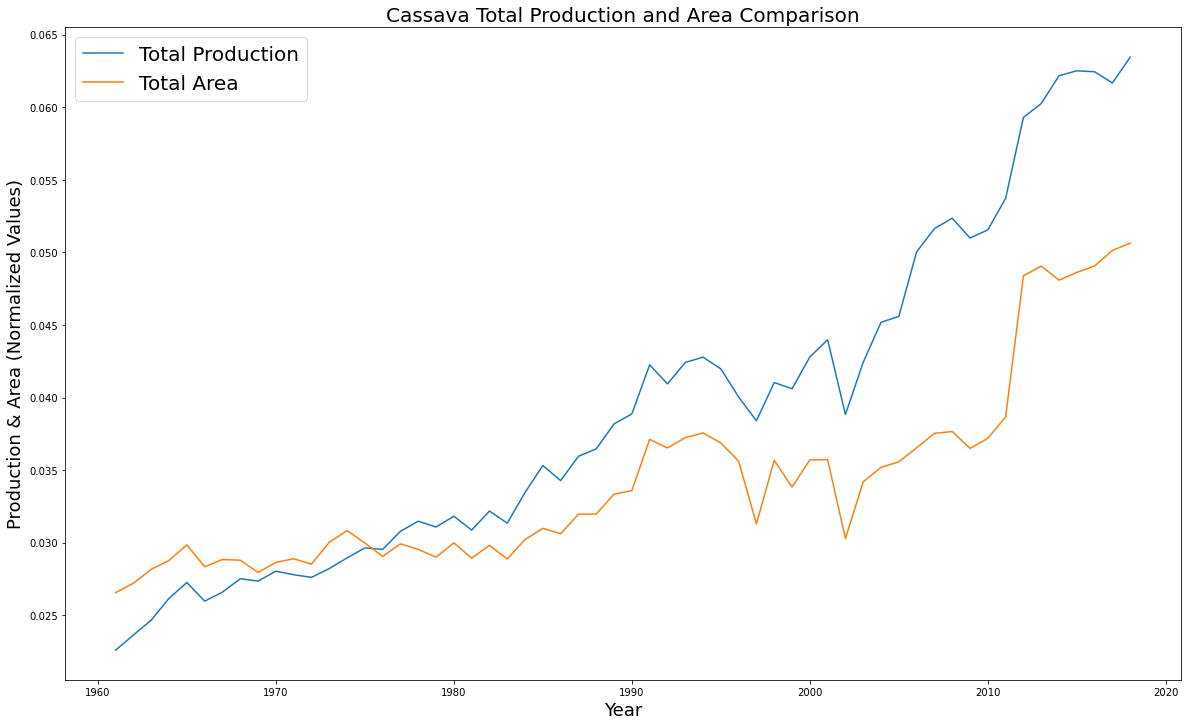

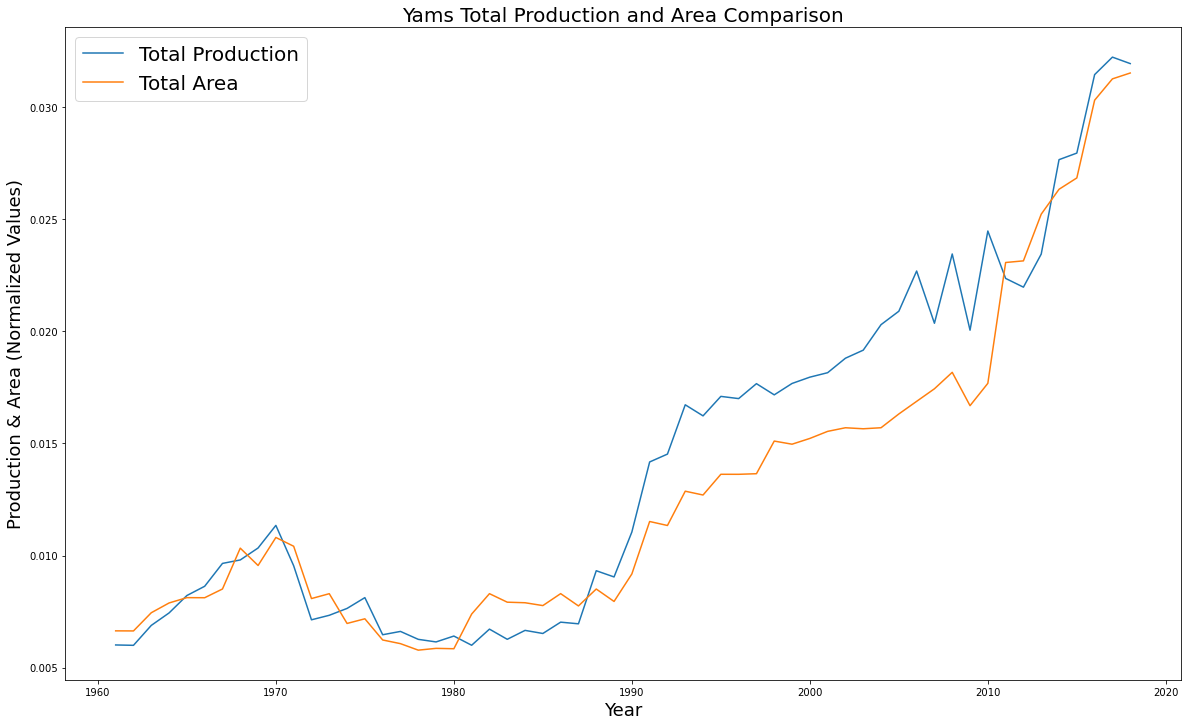

In [31]:
#Total Yield v. yield_hg_per_ha v yield_ha
#temp_crop = 'Potatoes'
def ind_graph(temp_crop):
    yield_diff = df[df['crop'] == temp_crop].copy();
    for_yield_diff = yield_diff[['year', 'yield_hg_per_ha','total_yield','continent','area_hectares']].copy();
    for_yield_diff['total_yield_sc'] = for_yield_diff['total_yield'] / max(for_yield_diff['total_yield'] );
    for_yield_diff['yield_hg_per_ha_sc'] = for_yield_diff['yield_hg_per_ha'] / max(for_yield_diff['yield_hg_per_ha'] );
    for_yield_diff['area_hectares'] = for_yield_diff['area_hectares'] / max(for_yield_diff['area_hectares'] );
    #for_yield_diff = df[['year', 'yield_hg_per_ha','total_yield','continent']]
    plt.figure(figsize = (20,12))
    #sns.lineplot(data=for_yield_diff, x="year", y="yield_hg_per_ha_sc",ci=None,label = 'Yield hg/ha',)
    sns.lineplot(data=for_yield_diff, x="year", y="total_yield_sc", label = 'Total Production',ci=None)
    sns.lineplot(data=for_yield_diff, x="year", y="area_hectares", label = 'Total Area',ci=None)

    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Production & Area (Normalized Values)', fontsize=18)
    plt.title(f'{temp_crop} Total Production and Area Comparison',fontsize = 20)
    plt.legend(fontsize = 20)
    plt.savefig(f'./images/{temp_crop}_yield_v_area.png',bbox_inches = 'tight');

temp_crops = list(df['crop'].unique())
for temp_crop in temp_crops:
    ind_graph(temp_crop)

In [32]:
df.to_csv('./output/data_post_eda.csv')